In [5]:
import pandas
import matplotlib.pyplot as plt
import numpy
from ridgeplot import ridgeplot

In [2]:
def load(path):
    df = pandas.read_csv(f"{path}/PolymerPerCarbon.csv",header=None)
    df.columns = pandas.read_csv(f"{path}/polymerList.txt",header=None,index_col=0).index.to_list()
    df.index = pandas.read_csv(f"{path}/GrowthExp.txt",header=None,index_col=0).index.to_list()
    return df

In [26]:
data = {
    "aerobic" : load("./polymer/aerobic/"),
    "anaerobic" : load("./polymer/anaerobic/"),
}
missing = list(set(data["aerobic"].index) - set(data["anaerobic"].index))
data["anaerobic"] = data["anaerobic"].T
data["anaerobic"][missing] = 0
data["anaerobic"] = data["anaerobic"].T
for k,v in data.items():
    data[k] = v.sort_index()

data = pandas.DataFrame({
    (outerKey, innerKey): values for outerKey, innerDict in data.items() for innerKey, values in innerDict.items()})

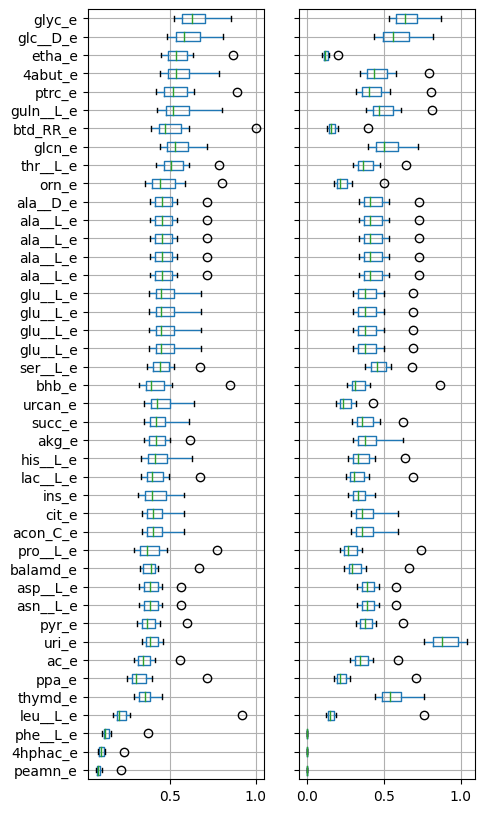

In [32]:
fig,ax = plt.subplots(1,2,figsize = (5,10))
order = data["aerobic"].mean(axis=1).sort_values(ascending=True).index
data["aerobic"].T[order].boxplot(vert=False,ax=ax[0])
data["anaerobic"].T[order].boxplot(vert=False,ax=ax[1])
_=ax[1].set_yticklabels([])
plt.savefig("./polymer/boxplot.svg",format="SVG")

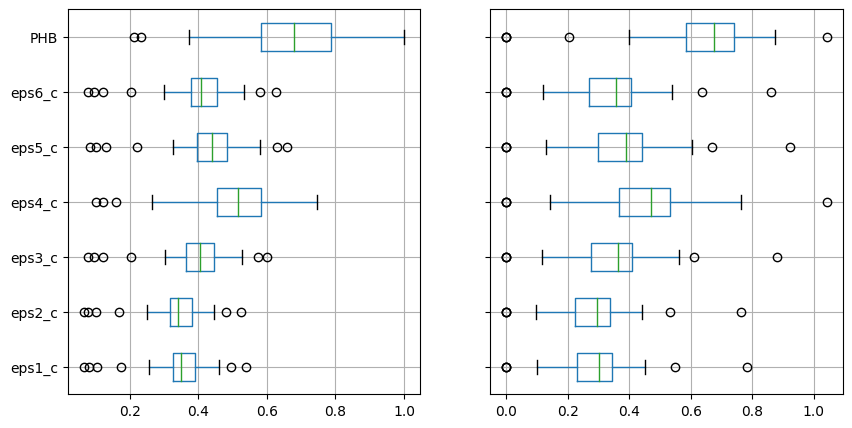

In [36]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
data["aerobic"].boxplot(vert=False,ax=ax[0])
data["anaerobic"].boxplot(vert=False,ax=ax[1])
_=ax[1].set_yticklabels([])

<Axes: >

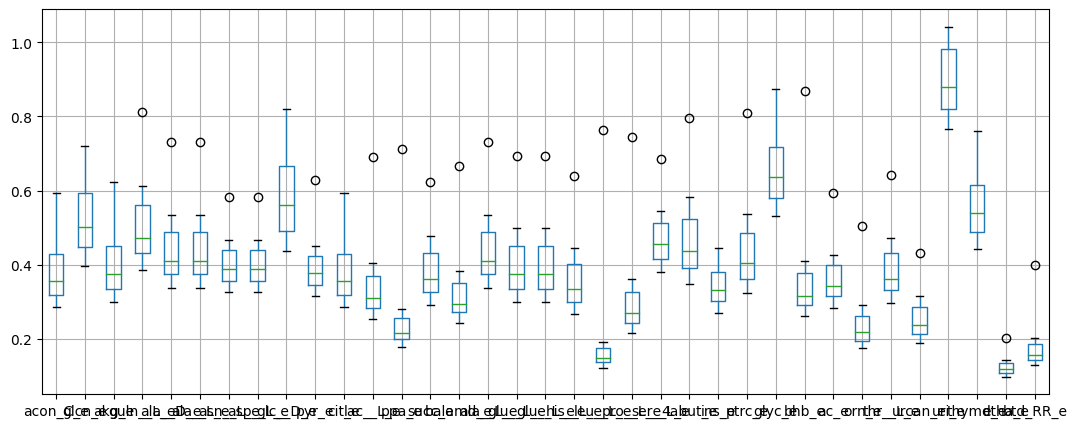

In [46]:
data["anaerobic"].T.boxplot(figsize=(13,5))

/tmp/ipykernel_1790559/2457420175.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds').copy()


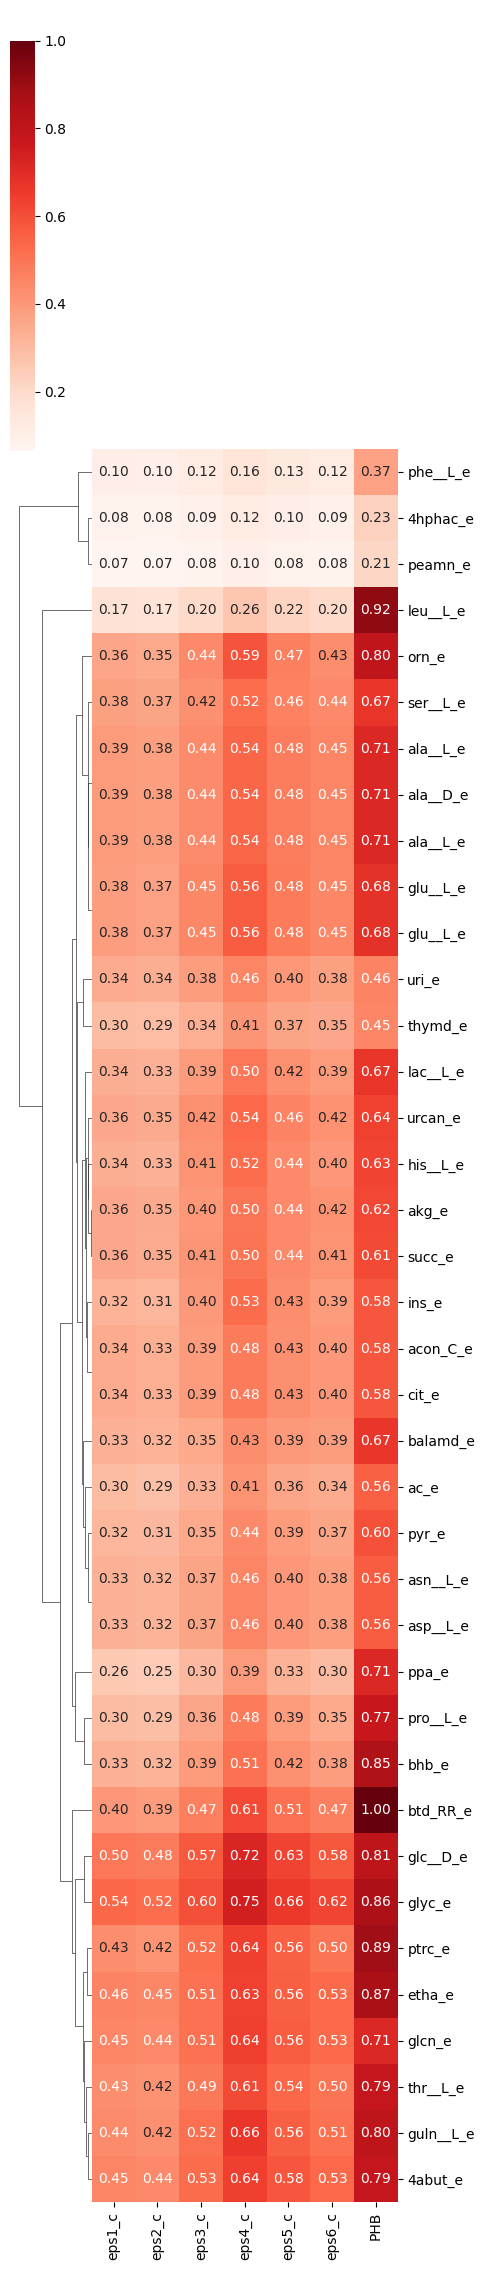

In [28]:
import seaborn as sns
cmap_df = df
cmap = plt.cm.get_cmap('Reds').copy()
cmap.set_under('white')
# vmin,vmax = (1.0,2)
cmap = sns.clustermap(cmap_df,
               row_cluster=True,
               col_cluster=False,
               # vmin=vmin,
               # vmax=vmax,
               annot=True,
               fmt=".2f",
               cmap=cmap,
               # annot_kws={'rotation': 90}
               figsize=(0.7*cmap_df.shape[1],(0.6)*cmap_df.shape[0]),
               # cbar=False,
              )
labels = [i.get_text() for i in cmap.ax_heatmap.yaxis.get_majorticklabels()]


/home/jt/venvs/coralme/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



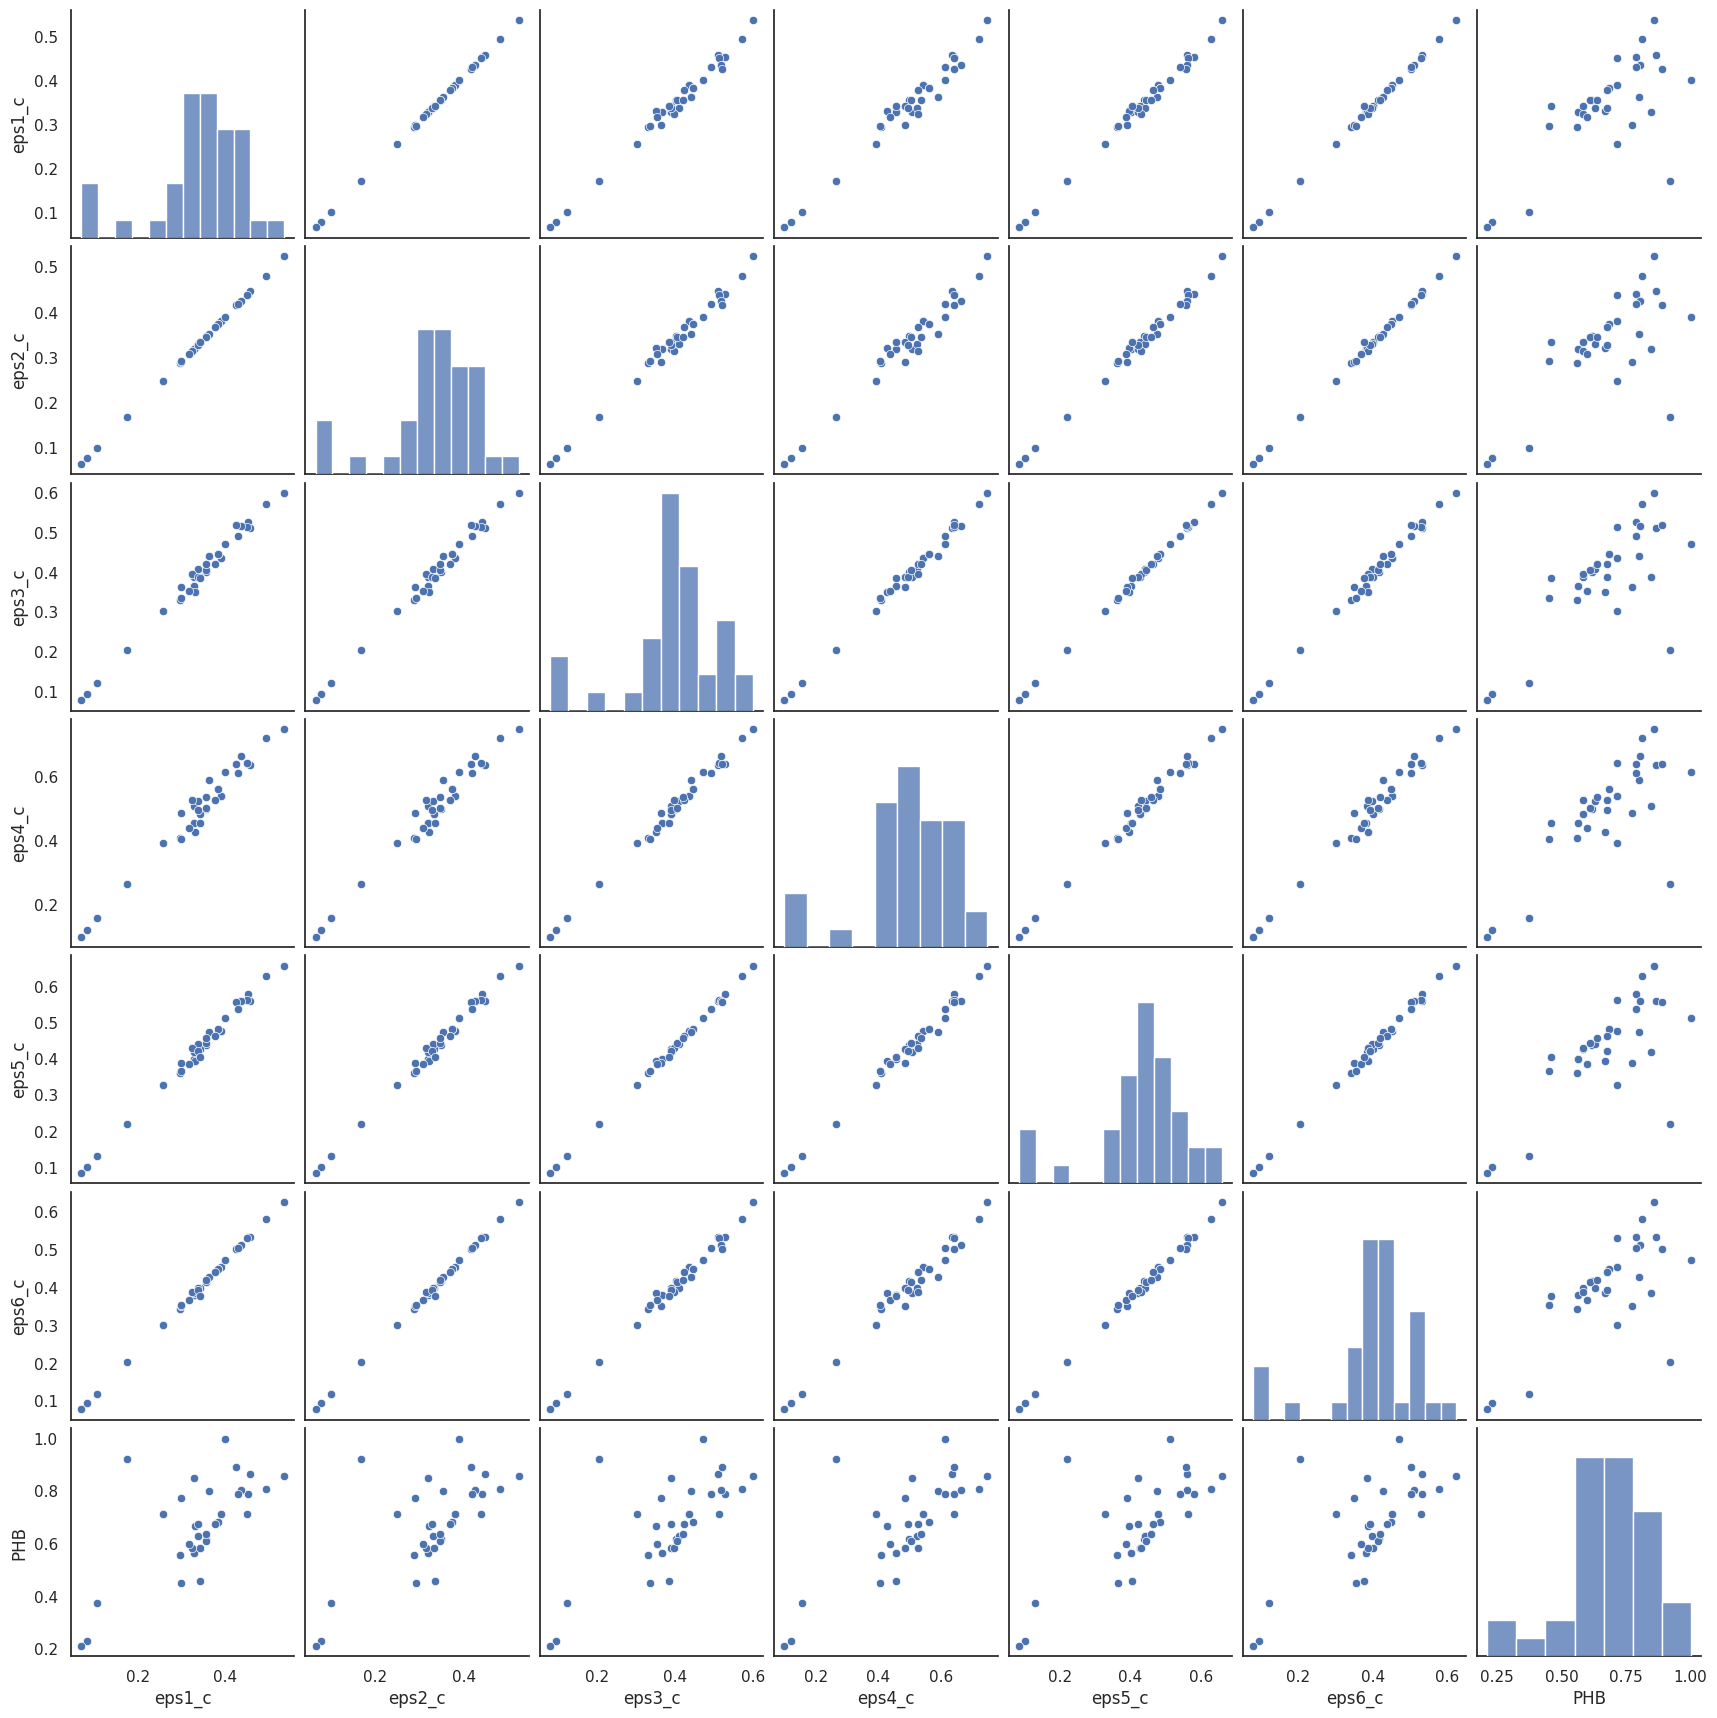

In [43]:
import seaborn as sns
sns.pairplot(data["aerobic"])

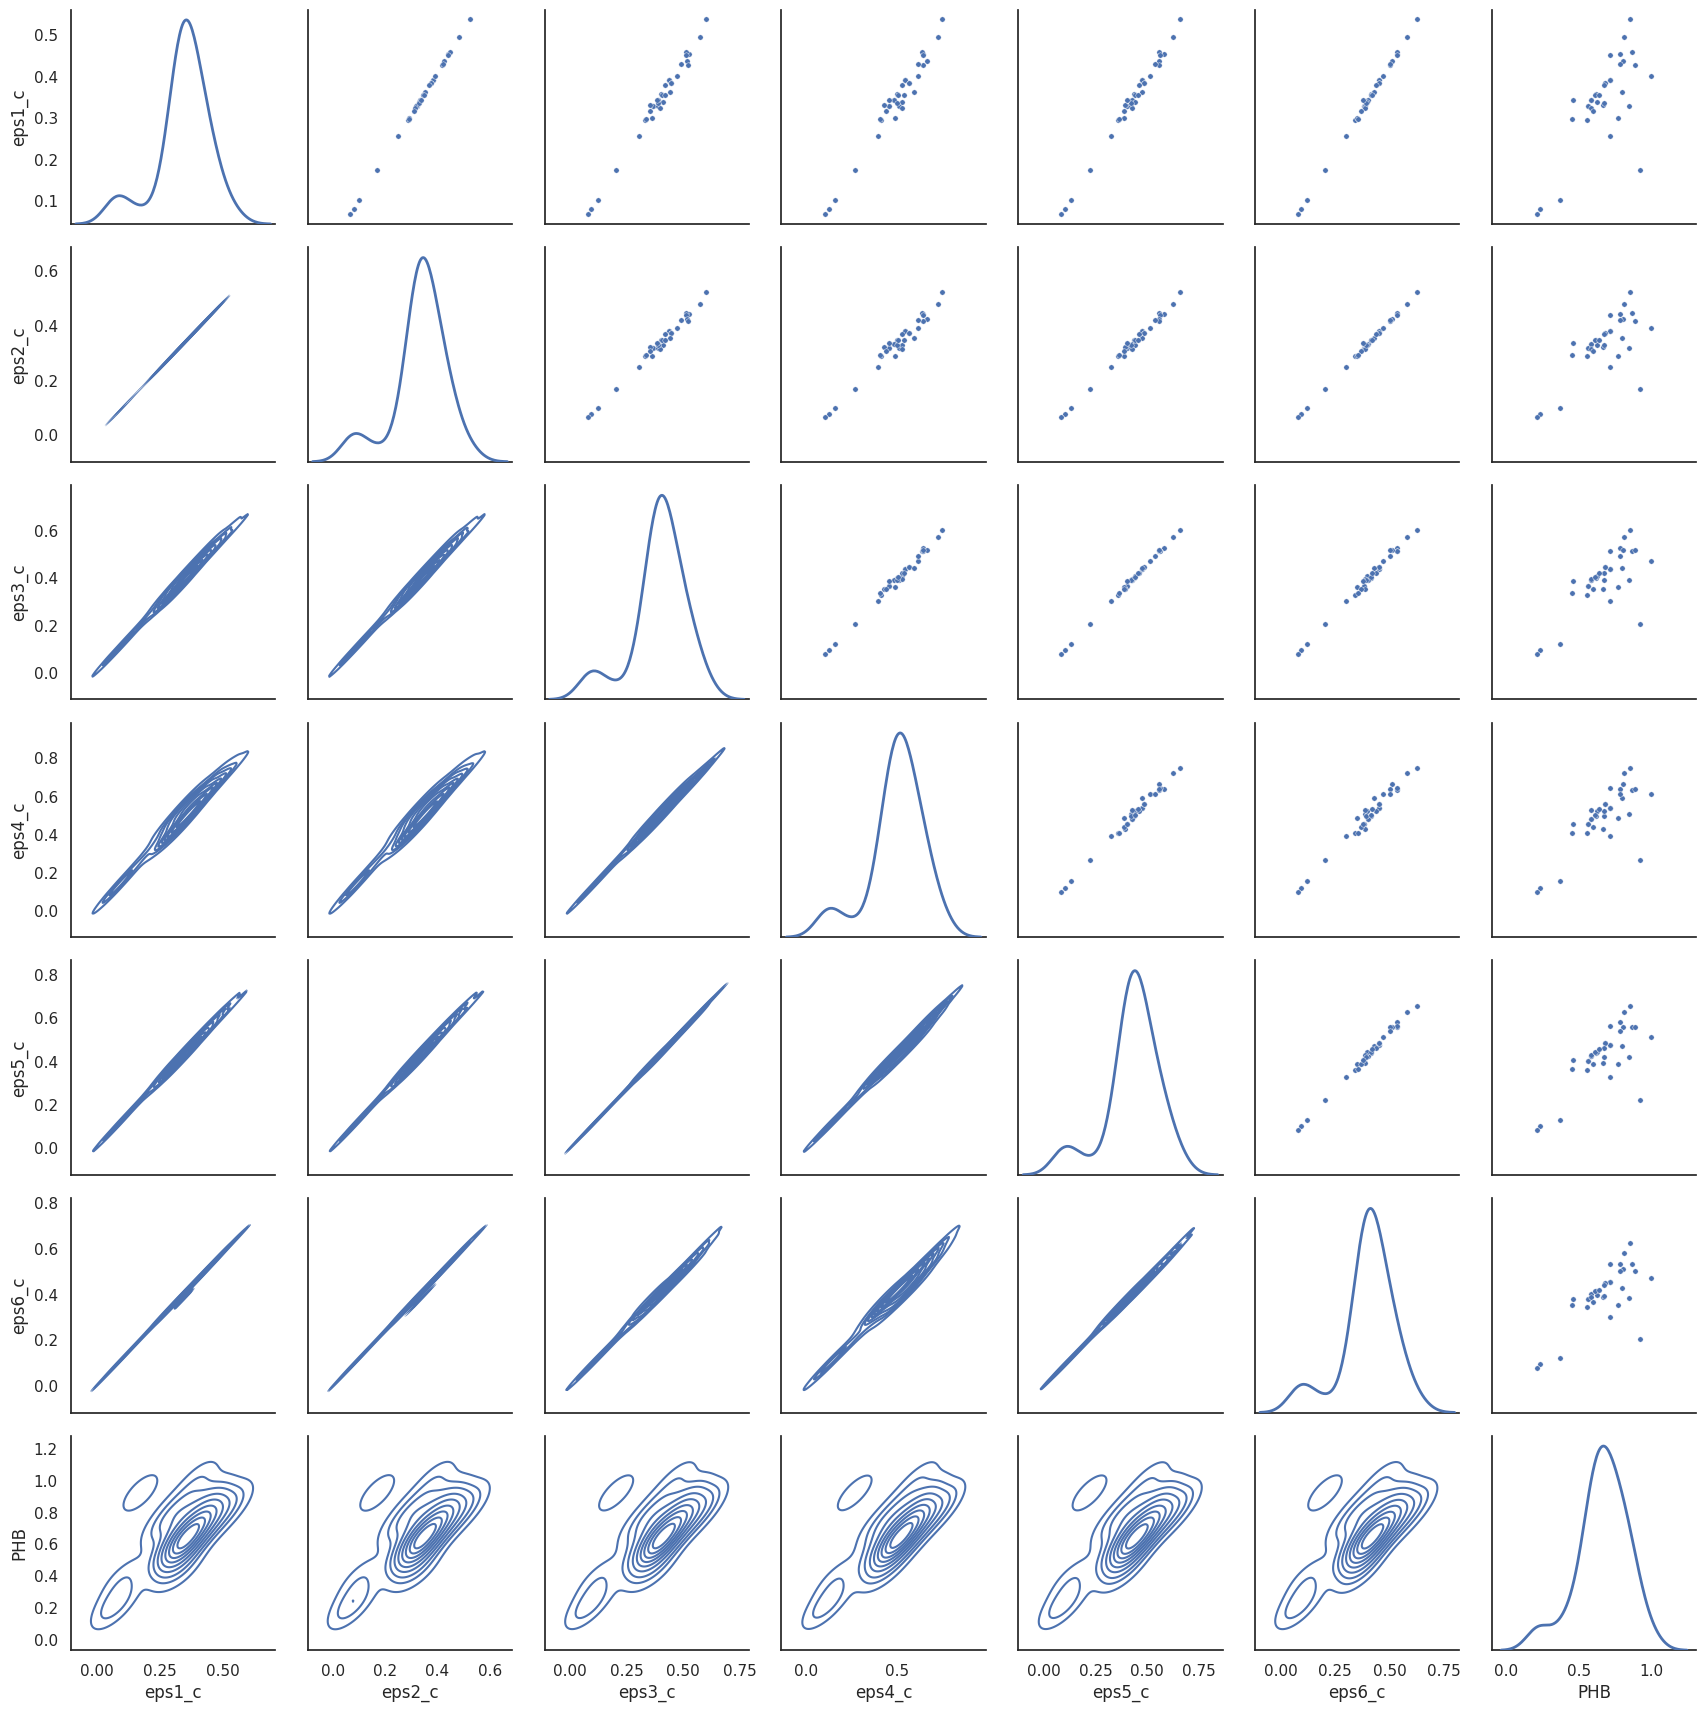

In [46]:
import seaborn as sns
sns.set_theme(style="white")
g = sns.PairGrid(data["aerobic"], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.savefig("KDEplot.png")